In [67]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates

import time
# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory

from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

Constants

In [68]:
PATH = "C:/Users/davez/Desktop/Investing with Data Science/"
S_DATE = "2017-02-01"
E_DATE = "2022-12-06"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125  # Approximate 10 year bond rate


Get Stock File Names in a List

In [69]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers
# tickers.remove('.ds_Store') MacOS Only
tickers.sort()
len(tickers)

3263

Function that returns a DataFrame from a CSV

In [70]:
# Reads a dataframe from the CSV file, changes index to date and returns it

def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

Merge Multiple Stocks into one DataFrame by Column Name

In [71]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # will hold data for all dataframes with the same column name
    multi_df = pd.DataFrame()

    for x in tickers:
         df = get_stock_df_from_csv(x)

         # check if the dataframe has duplicate indexes 
         # if not df.index.is_unique:
                # Delete duplicates
                # df = df.loc[~df.index.duplicated(), :]

         mask = (df.index >= sdate) & (df.index <= edate)  # masking of dates outside of desired start and end dates
         multi_df[x] = df.loc[mask][col_name]
    return multi_df

Markowitz Portfolio Optimization
Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.


The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.


Plotting an Efficient Frontier

Example Stock Portfolio

In [72]:
# 1ST LIST port_list = ['CALX', 'NOVT', 'BLDR', 'DXCM', 'RGEN', 'PFE', 'LLY',
# 'AMD', 'NVDA', 'NFLX', 'DAR', 'COST', 'BJ', 'WMT', 'BOOT', 'WING',
# 'LULU', 'NEE', 'AWK', 'MSCI', 'KKR', 'LPX', 'SHW', 'NXRT', 'NSA',
# 'CBRE', 'AES']

# 2ND LIST port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'LULU', 'NEE', 'MSCI', 'KKR', 'SHW', 'NSA',
# 'CBRE']
port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
'AMD', 'NFLX', 'COST', 'BJ', 'WING',
'MSCI', 'CBRE']
num_stocks = len(port_list)
num_stocks

11

Merge all Data by Closing Price

In [73]:
multi_df = merge_df_by_column_name("Close", S_DATE, E_DATE, *port_list)
multi_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-06,7.150000,22.950001,29.110001,69.873695,13.630000,140.970001,149.109604,NaN,24.142883,88.405006,31.020000
2017-02-07,7.000000,23.299999,29.240000,69.756989,13.290000,144.000000,149.547043,NaN,23.900116,88.006065,30.950001
2017-02-08,6.900000,23.500000,29.090000,70.125076,13.560000,144.740005,150.755447,NaN,24.226603,87.968086,30.780001
2017-02-09,7.000000,24.000000,30.270000,69.756989,13.420000,144.139999,153.029037,NaN,24.486107,85.802345,31.570000
2017-02-10,7.400000,24.400000,30.070000,69.837791,13.580000,144.820007,153.959961,NaN,24.519598,86.647743,34.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,46.799999,132.630005,189.990005,245.100006,105.239998,384.359985,492.429993,57.930000,150.550003,508.130005,98.330002
2022-01-31,50.279999,138.100006,198.339996,245.389999,114.250000,427.140015,505.130005,61.470001,153.250000,536.119995,101.339996
2022-02-01,52.060001,139.869995,202.889999,248.279999,116.779999,457.130005,508.410004,61.660000,156.550003,545.400024,101.529999


Plot Price of Investments over the Total Dataset

In [74]:
fig = px.line(multi_df, x=multi_df.index, y=multi_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1100, width=1200, showlegend=True)

fig.show()

Cumulative Return for All Stocks

In [75]:
multi_cum_df = merge_df_by_column_name('cum_return', S_DATE, E_DATE, *port_list)
multi_cum_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-07,0.979021,1.015250,1.004466,0.998330,0.975055,1.021494,1.002934,NaN,0.989945,0.995487,0.997743
2017-02-08,0.965035,1.023965,0.999313,1.003598,0.994864,1.026743,1.011038,NaN,1.003468,0.995058,0.992263
2017-02-09,0.979021,1.045752,1.039849,0.998330,0.984593,1.022487,1.026286,NaN,1.014216,0.970560,1.017730
2017-02-10,1.034965,1.063181,1.032978,0.999486,0.996332,1.027311,1.032529,NaN,1.015604,0.980123,1.096067
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,6.545454,5.779085,6.526623,3.507758,7.721203,2.726537,3.302470,2.633182,6.235792,5.747751,3.169890
2022-01-31,7.032168,6.017429,6.813466,3.511908,8.382245,3.030006,3.387642,2.794091,6.347626,6.064362,3.266924
2022-02-01,7.281119,6.094553,6.969770,3.553268,8.567865,3.242747,3.409640,2.802727,6.484313,6.169334,3.273050


Plot Cumulative Rate of Returns

In [76]:
fig = px.line(multi_df, x=multi_cum_df.index, y=multi_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Cumulative Return")
fig.update_layout(height=1100, width=1200, showlegend=True)

fig.show()

Mean Rate of Returns

In [77]:
returns = np.log(multi_df / multi_df.shift(1))  # price shift
mean_ret = returns.mean() * 252  # annual mean return
mean_ret

CALX    0.386939
NOVT    0.353465
RGEN    0.384411
LLY     0.251157
AMD     0.435869
NFLX    0.211700
COST    0.250907
BJ      0.282939
WING    0.366390
MSCI    0.362618
CBRE    0.238682
dtype: float64

Correlation

In [78]:
# We want great performing stocks that go up when others go down to smoove the returns over the year, correlation < 0.5
returns.corr()

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
CALX,1.000000,0.369959,0.229957,0.135734,0.258900,0.219911,0.241079,0.150248,0.248821,0.331309,0.318629
NOVT,0.369959,1.000000,0.371875,0.270159,0.414330,0.359159,0.373853,0.194379,0.332225,0.502868,0.411074
RGEN,0.229957,0.371875,1.000000,0.285680,0.378718,0.339358,0.304092,0.198963,0.280199,0.419744,0.172984
LLY,0.135734,0.270159,0.285680,1.000000,0.226871,0.221616,0.359300,0.211223,0.137627,0.313727,0.258185
AMD,0.258900,0.414330,0.378718,0.226871,1.000000,0.398259,0.320223,0.195482,0.272484,0.442430,0.295300
NFLX,0.219911,0.359159,0.339358,0.221616,0.398259,1.000000,0.348728,0.164617,0.254699,0.431951,0.193867
COST,0.241079,0.373853,0.304092,0.359300,0.320223,0.348728,1.000000,0.396802,0.239313,0.440361,0.327144
BJ,0.150248,0.194379,0.198963,0.211223,0.195482,0.164617,0.396802,1.000000,0.087996,0.168504,0.082975
WING,0.248821,0.332225,0.280199,0.137627,0.272484,0.254699,0.239313,0.087996,1.000000,0.376216,0.224414
MSCI,0.331309,0.502868,0.419744,0.313727,0.442430,0.431951,0.440361,0.168504,0.376216,1.000000,0.445044


Generate Random Weights Equal to 1 to begin to randomly screen for portfolios that have low correlation

In [79]:
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights : ', weights)
print('Total Weight :', np.sum(weights))

Weights :  [0.02452266 0.14264535 0.12784119 0.07535681 0.03443648 0.00031537
 0.08608564 0.1138018  0.12962143 0.11570987 0.1496634 ]
Total Weight : 1.0


Calculating Return of Portfolio using a Random Weighting

In [80]:
# Provide return of portfolio using random weights over the whole dataset

np.sum(weights * returns.mean()) * 252   # because average of 252 days in a stock year

0.3220264163795845

Calculating Volatility or Standard Deviation

In [81]:
# using Linear Algebra (dot product, covariance) to assess volatility

np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))  # T = transpose


0.22720779455585424

Analyzing Returns & Risks of 10000 Combinations

In [82]:
p_ret = []  # Returns list
p_vol = []  # Volatility list
p_SR = []  # Sharpe Ratio list
p_wt = []  # Stock weights list

for x in range(10000):

    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)


    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)


    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)


    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)


    # Store the weights for each protfolio
    p_wt.append(p_weights)


# Convert to numpy arrays

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt




(array([0.33079437, 0.33126902, 0.31686968, ..., 0.28938936, 0.31763885,
        0.30153681]),
 array([0.24560842, 0.24474386, 0.24086758, ..., 0.21131719, 0.24316939,
        0.24401025]),
 array([1.29594244, 1.30245974, 1.26363907, ..., 1.3103021 , 1.25484068,
        1.18452733]),
 array([[0.07388192, 0.0879083 , 0.09463728, ..., 0.09424439, 0.13385057,
         0.08141011],
        [0.12753683, 0.12751189, 0.08736708, ..., 0.11250551, 0.07007996,
         0.02769301],
        [0.13228332, 0.09954031, 0.00713195, ..., 0.04249566, 0.12665886,
         0.0836349 ],
        ...,
        [0.01260725, 0.06387518, 0.09657897, ..., 0.09901126, 0.05605929,
         0.12604192],
        [0.11846199, 0.01899249, 0.11237035, ..., 0.0255462 , 0.09374332,
         0.10176391],
        [0.00930186, 0.17518419, 0.17653136, ..., 0.00429788, 0.0124857 ,
         0.03145697]]))

Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

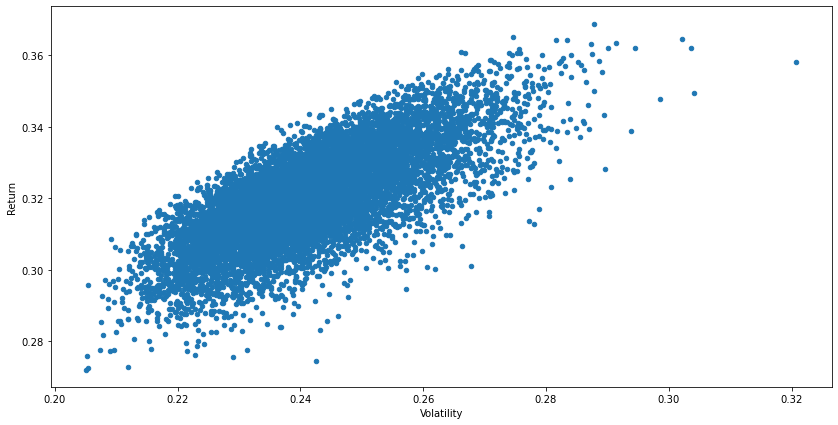

In [83]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(14, 7))

Sharpe Ratio 

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk.

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [84]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1

# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])

# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : CALX : 7.54
Stock : NOVT : 9.72
Stock : RGEN : 10.99
Stock : LLY : 21.75
Stock : AMD : 0.71
Stock : NFLX : 0.10
Stock : COST : 19.66
Stock : BJ : 4.63
Stock : WING : 9.64
Stock : MSCI : 8.70
Stock : CBRE : 6.57

Volatility : 0.2091710635842352
Return : 0.30865193983920813


Function to determine how many shares of each stock to buy given recommended % of portfolio and share price

In [85]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

Get Portfolio Weighting

In [86]:
def get_port_weighting(share_cost):

    # Holds weights for stocks
    stock_wts = []

    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)

    for x in share_cost:
        stock_wts.append(x / tot_val)

    return stock_wts

Return the Value of Portfolio by Date

In [87]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close', date, date, *port_list)

    # Convert from dataframe to python list
    port_prices = port_prices.values.tolist()

    # Trick to convert a list of lists into a single list
    port_prices = sum(port_prices, [])

    return port_prices


Approximate Portfolio Weighting Based on Request

In [91]:
port_list = ["CALX", "NOVT", "RGEN", "LLY", "AMD", "NFLX",   # from example portfolio
"COST", "BJ", "WING", "MSCI", "CBRE"]

port_wts = [4,3,8,20,4,4,17,6,15,17,0]  # from the above ideal portfolio weighting using random weighting to find neg-correlation

# Get all stock prices on the starting date 
port_df_start = merge_df_by_column_name('Close', '2022-01-07', '2022-01-07', *port_list)

# Convert from dataframe to python list
port_prices = port_df_start.values.tolist()

# Trick to convert a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(105.64, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares : [7, 1, 4, 8, 3, 1, 3, 9, 9, 3, 1]
Share Cost : [418.1800117492676, 159.9199981689453, 827.1599731445312, 2076.0, 396.0, 541.0599975585938, 1608.5399780273438, 591.2100219726562, 1473.75, 1656.0, 104.77999877929688]
Total Investment : 9852.599979400635
Stock Weights : [0.04244362022446656, 0.016231248452520018, 0.08395347165965526, 0.21070580398477617, 0.040192436598252106, 0.05491545365586924, 0.163260457279338, 0.06000548314239197, 0.14957980665826778, 0.16807746213814517, 0.010634756206317734]


[]